Data comes from Pensylvania's [Department of Environmental Protection](https://www.dep.pa.gov/DataandTools/Reports/Oil%20and%20Gas%20Reports/pages/default.aspx), specifically their [permits issued database](http://cedatareporting.pa.gov/Reportserver/Pages/ReportViewer.aspx?/Public/DEP/OG/SSRS/Permits_Issued_Detail) for a request from 1969 to 11/23/2021.

# Reading in and cleaning

## Read in the permits database

In [3]:
import pandas as pd 
import numpy as np

df = pd.read_csv("Permits_Issued_Detail.csv")

## Make sure you can see all of the columns!

I didn't remove extra ones for you this time! It's a trick that involves `pd.set_option`.

In [10]:
df.columns = df.columns.str.lower()
df.columns
pd.set_option("display.max_columns", None)
df.head()

,region,county,municipality,permit_issued_date,operator,application_type,auth_type_description,well_api,unconventional,configuration,well_type,farm_name,spud_date,latitude_degrees,longitude_degrees,latitude_decimal,longitude_decimal,ogo_num,operator_address,city,state,zip_code,authorization_id,client_id,prmry_fac_id
0,EP DOGO SWDO Dstr Off,Allegheny,Aleppo Twp,2011-03-29,AMER NATURAL RESOURCES LLC,NEW,Drill & Operate Well Permit,003-22174,No,Vertical Well,OIL,MERLE MINICK UNIT 2,04/04/2011,40º 31' 42.97'',-80º 7' 18.74'',40.528603,-80.121872,OGO-38150,PO BOX 306\n520 W PARKWOOD DR\n,RURAL VALLEY,PA,16249-0306,868846,233217,739460
1,EP DOGO SWDO Dstr Off,Allegheny,Aleppo Twp,2011-04-04,AMER NATURAL RESOURCES LLC,NEW,Drill & Operate Well Permit,003-22175,No,Vertical Well,OIL,MERLE MINICK UNIT 1,04/11/2011,40º 32' 0.71'',-80º 7' 22.28'',40.533531,-80.122856,OGO-38150,PO BOX 306\n520 W PARKWOOD DR\n,RURAL VALLEY,PA,16249-0306,869305,233217,739552
2,EP DOGO SWDO Dstr Off,Allegheny,Avalon Boro,1986-09-05,UNKNOWN OPR,NEW,Drill & Operate Well Permit,003-21196,No,Vertical Well,GAS,HARTMAN/BEEDLE 1,01/01/1800,40º 29' 46.23'',-80º 3' 50.059'',40.496175,-80.063905,OGO-99999,UNKNOWN ADDL ADDRESS\n,UNKNOWN,PA,17101,52192,40263,7714
3,EP DOGO SWDO Dstr Off,Allegheny,Bethel Park Boro,1971-09-30,PEOPLES NATURAL GAS CO LLC,NEW,Drill & Operate Well Permit,003-20782,No,Vertical Well,GAS,WALTER PHILIPS ETAL 974,01/31/1914,40º 17' 29.09'',-80º 2' 35.614'',40.291415,-80.043226,OGO-39243,1201 PITT ST\n,PITTSBURGH,PA,15221-2029,51882,189839,7453
4,EP DOGO SWDO Dstr Off,Allegheny,Bethel Park Boro,1976-04-06,PEOPLES NATURAL GAS CO LLC,NEW,Drill & Operate Well Permit,003-20892,No,Vertical Well,GAS,JAS B PHILIPS SR 1165,08/04/1916,40º 17' 31.12'',-80º 2' 39.88'',40.291978,-80.044411,OGO-39243,1201 PITT ST\n,PITTSBURGH,PA,15221-2029,51947,189839,7509


## Speaking of columns, is anything a datetime?

In [12]:
df.info()
#not to start!
# but permit_issued_date and spud_date could potentially be converted 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212471 entries, 0 to 212470
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 212471 non-null  object 
 1   county                 212471 non-null  object 
 2   municipality           212471 non-null  object 
 3   permit_issued_date     212471 non-null  object 
 4   operator               212471 non-null  object 
 5   application_type       212471 non-null  object 
 6   auth_type_description  212471 non-null  object 
 7   well_api               212471 non-null  object 
 8   unconventional         212471 non-null  object 
 9   configuration          212471 non-null  object 
 10  well_type              212471 non-null  object 
 11  farm_name              212471 non-null  object 
 12  spud_date              151219 non-null  object 
 13  latitude_degrees       166542 non-null  object 
 14  longitude_degrees      166542 non-nu

## I would like the permit issued date to be a datetime

You can do this either right now or through `.read_csv`, either way is fine. It isn't a big dataset, so there's no downside to doing it a slower way!

In [13]:
df.permit_issued_date


0         2011-03-29
1         2011-04-04
2         1986-09-05
3         1971-09-30
4         1976-04-06
             ...    
212466    2020-05-12
212467    2020-06-16
212468    2020-06-16
212469    2021-04-15
212470    2021-04-15
Name: permit_issued_date, Length: 212471, dtype: object

In [16]:
pd.to_datetime(df.permit_issued_date, errors="coerce", format="%Y-%m-%d")
df.permit_issued_date = pd.to_datetime(df.permit_issued_date, errors="coerce", format="%Y-%m-%d")
df.permit_issued_date

0        2011-03-29
1        2011-04-04
2        1986-09-05
3        1971-09-30
4        1976-04-06
            ...    
212466   2020-05-12
212467   2020-06-16
212468   2020-06-16
212469   2021-04-15
212470   2021-04-15
Name: permit_issued_date, Length: 212471, dtype: datetime64[ns]

# Looking at issue dates

## When was the earlier permit in this dataset issued?

In [18]:
df.permit_issued_date.sort_values()
#1969-01-02

56672    1969-01-02
136718   1969-01-02
136719   1969-01-02
136715   1969-01-02
136714   1969-01-02
            ...    
64259    2021-11-18
64258    2021-11-18
64256    2021-11-18
64260    2021-11-18
64257    2021-11-18
Name: permit_issued_date, Length: 212471, dtype: datetime64[ns]

## What year has the most permits issued?

I wouldn't expect this to be seasonal, but who knows - it gets pretty cold in Pennsylvania in the winter, so maybe everyone just sleeps all the time?

In [20]:
df.permit_issued_date.dt.year.value_counts()

1984    13827
1981     9483
1982     9266
1983     8003
2008     7974
1985     7839
1980     7618
2006     7345
2007     7299
2010     6597
2009     6241
2005     6045
2011     5745
1978     5178
1979     4991
2013     4612
2004     4602
2014     4451
2012     4217
1976     3881
2003     3830
1977     3828
1973     3669
1986     3483
1972     3384
1975     3354
1974     3272
2002     3193
2001     3011
1969     2781
1970     2756
1971     2642
2015     2525
1987     2452
2000     2290
2017     2225
2018     2149
1988     2085
1991     2003
1990     1993
1998     1988
1999     1981
1997     1878
1996     1820
1989     1797
2019     1705
1992     1677
1994     1658
2016     1482
1993     1221
1995     1207
2020     1020
2021      898
Name: permit_issued_date, dtype: int64

## **Graph permits issued by month**

Make sure the x axis is in the right order!

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sept'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

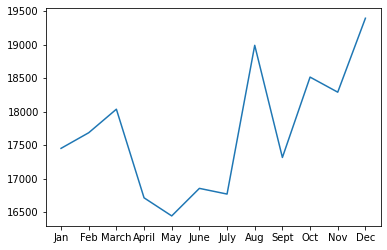

In [25]:
ax = df.permit_issued_date.dt.month.value_counts().sort_index().plot()
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

## What's the difference between doing `.plot()` and `.plot(kind='bar')`? Which one do you feel is a better representation of the data?

In [ ]:
#.plot() automatically gives you a line graph, whereas .plot(kind=bar) will give you a bar graph 
#I like a bar graph for this data bc line graph implies change over time, whereas bar shows count per x-axis value
# since we are counting permits issued by month, a bar graph will better represent # of permits grouped into months


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sept'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

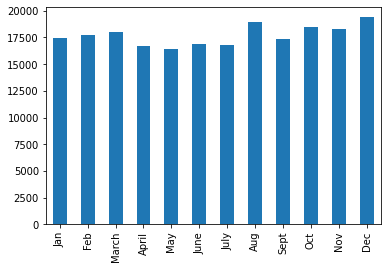

In [27]:
ax = df.permit_issued_date.dt.month.value_counts().sort_index().plot(kind='bar')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
#QUESTION: why does bar graph require starting labels with [0] and line graph starts at [1]?

In [ ]:
#hmm...but, that said, the bar graph actually feels less informative w/o a yaxis limit 

### Bonus trick: axis labeling

**If you want to make your graphs look a little nicer, you can use some manual effort and make it happen!** In matplotlib, `.set_xticks` will show what tick marks to put on the bottom axis, and `set_xticklabels` will give them names. So for example, the code below will plot January, June and December on your graph.

```python
ax = df......plot()
ax.set_xticks([1, 6, 12])
ax.set_xticklabels(['Jan', 'June', 'Dec'])
```

Compare the results for `.plot()` vs `.plot(kind='bar')`. In theory the difference makes sense because bar plots are for categorical data, but speaking honestly: _matplotlib is a nightmare._

In [ ]:
# Compared above and YES couldn't agree more!

# Permits over time

## Graph permits issued by week (W), month (M) and quarter (Q)

Which is the best representation of the trend in issued permits?

<AxesSubplot:xlabel='permit_issued_date'>

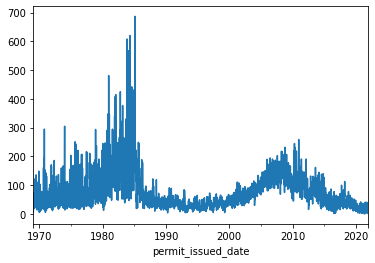

In [28]:
df.resample('W', on='permit_issued_date').size().plot()

#homicides_df.resample('M', on='incident_datetime').size().plot()

<AxesSubplot:xlabel='permit_issued_date'>

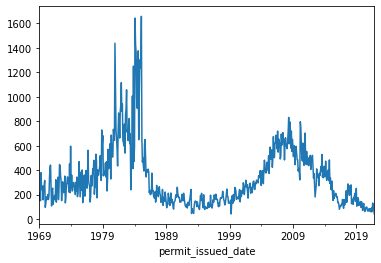

In [29]:
df.resample('M', on='permit_issued_date').size().plot()


<AxesSubplot:xlabel='permit_issued_date'>

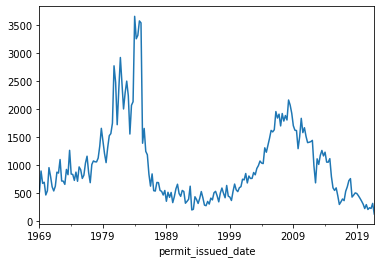

In [30]:
df.resample('Q', on='permit_issued_date').size().plot()
# I think this is the most representational graph bc it's the least busy while still showing extreme changes


## What month had the fewest permits issued?

In [32]:
df.resample('M', on='permit_issued_date').size().sort_index()
#2021-11

permit_issued_date
1969-01-31    156
1969-02-28    215
1969-03-31    151
1969-04-30    380
1969-05-31    242
             ... 
2021-07-31     62
2021-08-31    131
2021-09-30    121
2021-10-31     81
2021-11-30     43
Freq: M, Length: 635, dtype: int64

In [43]:
#df.permit_issued_date.str.contains('1969-01')
df[df.permit_issued_date.dt.day >= 2021-11]
#homicides_df = homicides_df[homicides_df.incident_datetime.dt.year > 2014]

#It LOOKS like this month does not have any data?? Transparently, I'm unsure bc it says -->
    # the month of Nov. 2021 has 43 data entries 

,region,county,municipality,permit_issued_date,operator,application_type,auth_type_description,well_api,unconventional,configuration,well_type,farm_name,spud_date,latitude_degrees,longitude_degrees,latitude_decimal,longitude_decimal,ogo_num,operator_address,city,state,zip_code,authorization_id,client_id,prmry_fac_id


I'm going to tell you: **this is not a valid month to analyze.** Why not?

## What year had the most permits issued?

In [45]:
df.resample('Y', on='permit_issued_date').size().sort_index()
#1969

permit_issued_date
1969-12-31     2781
1970-12-31     2756
1971-12-31     2642
1972-12-31     3384
1973-12-31     3669
1974-12-31     3272
1975-12-31     3354
1976-12-31     3881
1977-12-31     3828
1978-12-31     5178
1979-12-31     4991
1980-12-31     7618
1981-12-31     9483
1982-12-31     9266
1983-12-31     8003
1984-12-31    13827
1985-12-31     7839
1986-12-31     3483
1987-12-31     2452
1988-12-31     2085
1989-12-31     1797
1990-12-31     1993
1991-12-31     2003
1992-12-31     1677
1993-12-31     1221
1994-12-31     1658
1995-12-31     1207
1996-12-31     1820
1997-12-31     1878
1998-12-31     1988
1999-12-31     1981
2000-12-31     2290
2001-12-31     3011
2002-12-31     3193
2003-12-31     3830
2004-12-31     4602
2005-12-31     6045
2006-12-31     7345
2007-12-31     7299
2008-12-31     7974
2009-12-31     6241
2010-12-31     6597
2011-12-31     5745
2012-12-31     4217
2013-12-31     4612
2014-12-31     4451
2015-12-31     2525
2016-12-31     1482
2017-12-31     2225
2

**Why so many in the early 80's?** There was money to be made! But [then it all came crashing down](https://en.wikipedia.org/wiki/1980s_oil_glut).

If we were historians or economists this dataset could be a lot more fun.

In [ ]:
# because there was a [relative] oil boom during that time in the region!
    # Ilena, Stephen and I did our Reporting 2 project on abandoned oil wells in NYC!

# Application Types

## What are the different application types?

There are three types of applications: new, renewals, and modifications. How many of each type are in this dataset?

In [47]:
df.application_type.value_counts()

NEW    202528
REN      8165
MOD      1778
Name: application_type, dtype: int64

## How many of each application type were granted in each month?

I don't know if we've ever done this! But think about it: 

1. You want to put them into groups based on their month. What's the `groupby` equivalent for time?
2. You want to count the number of applications types, just like you did in the cell above.

The result should look something like this:

```
PERMIT_ISSUED_DATE  APPLICATION_TYPE
2000-11-30          NEW                 157
                    REN                   7
2000-12-31          NEW                 194
                    REN                   8
2001-01-31          NEW                 228
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
```

In [153]:
df.resample('M', on='permit_issued_date').application_type.value_counts()
#QUESTION: I'd left .size() after resampling command here, which caused an error -->
    # what exactly does .size() do??

permit_issued_date  application_type
1969-01-31          NEW                 156
1969-02-28          NEW                 215
1969-03-31          NEW                 151
1969-04-30          NEW                 380
1969-05-31          NEW                 242
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
Name: application_type, Length: 1055, dtype: int64

In [154]:
#Here lies a bunch of work that did not lead to the right answer:

#df.application_type.value_counts().groupby([TimeGrouper(freq='M'), df.application_type])
#groupby([TimeGrouper(freq='Min'), df.Source])
#df.groupby(by='agency').complaint_type.value_counts().groupby(level=0, group_keys=False).nlargest(3)


#df.application_type.value_counts().groupby([df['permit_issued_date'],pd.TimeGrouper(freq='M')])
#df.groupby([df['Source'],pd.TimeGrouper(freq='Min')])
#df.groupby(['product', pd.TimeGrouper(freq='1M')])['sales'].sum()
#df.permit_issued_date.dt.month.value_counts().sort_index().plot()
# df.permit_issued_date.dt.month.value_counts()
# df.application_type.value_counts().sort_index()

#df.groupby(by='permit_issued_date').application_type.value_counts().sort_index()
# df.created_date.dt.strftime('%B')
#df.permit_issued_date.dt.strftime('%m').application_type.value_counts()


### Converting into a dataframe

If we wanted to plot how new vs renewals vs modifications changed over time, we can't just do `.plot()`. I mean, try it, see what happens!

<AxesSubplot:xlabel='permit_issued_date,application_type'>

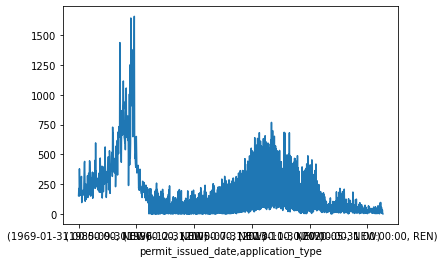

In [155]:
df.resample('M', on='permit_issued_date').application_type.value_counts().plot()
#horrible!

**It's awful.** But here's what you can do to switch the month-category groups into something nice: remove the `.plot()`, toss an `.unstack()` on the end, and you'll end up with something like this:

|APPLICATION_TYPE|MOD|NEW|REN|
|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|2000-11-30|NaN|157.0|7.0|
|2000-12-31|NaN|194.0|8.0|
|...|...|...|...|

In [160]:
df.resample('M', on='permit_issued_date').application_type.value_counts().unstack()
#QUESTION: how is .unstack() making this look dataframe-y?
applications_df = df.resample('M', on='permit_issued_date').application_type.value_counts().unstack()
applications_df

application_type,MOD,NEW,REN
permit_issued_date,,,
1969-01-31,NaN,156.0,NaN
1969-02-28,NaN,215.0,NaN
1969-03-31,NaN,151.0,NaN
1969-04-30,NaN,380.0,NaN
1969-05-31,NaN,242.0,NaN
...,...,...,...
2021-07-31,3.0,45.0,14.0
2021-08-31,17.0,92.0,22.0
2021-09-30,12.0,98.0,11.0


Nice, right? But even nicer: put a `.plot()` after it.

<AxesSubplot:xlabel='permit_issued_date'>

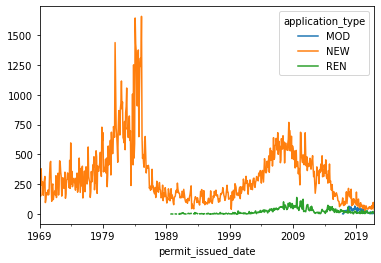

In [157]:
df.resample('M', on='permit_issued_date').application_type.value_counts().unstack().plot()
#nifty!

**Incredible!** This happens because it plots **each column as its own line.** Three columns, three lines!

The practice of moving your data around to get it into the format you want is called **reshaping**, and it's pretty common requirement when you're trying to get a particular kind of graph. You can [watch a YouTube video I made about the topic](https://www.youtube.com/watch?v=O4538i9MQEc) if you'd like to learn more.

## When was the first `MOD` permit issued?

They seem to not exist in the database initially, but showed u
p at some point later. How can we calculate this? There are a few different methods: some involving filtering, some involving groupby, some involving sorting, some involving `.min()`...

In [164]:
df[df.application_type == 'MOD'].permit_issued_date.sort_values()
#2016-11-04

18228    2016-11-04
141372   2016-11-15
20188    2016-11-23
18230    2016-12-20
142922   2017-01-13
            ...    
198319   2021-11-10
139753   2021-11-15
25073    2021-11-15
25074    2021-11-15
25075    2021-11-15
Name: permit_issued_date, Length: 1778, dtype: datetime64[ns]

In [56]:
df[df.application_type == 'MOD'].permit_issued_date.min()

Timestamp('2016-11-04 00:00:00')

In [142]:
#df[df.application_type == 'MOD'].groupby(by='permit_issued_date').value_counts()
# QUESTION: what am I doing wrong here with the groupby part of this? 

## What are the top five counties for granting new permits?

In [194]:
df[df.application_type == 'NEW'].county.value_counts().head()
new_df = df[df.application_type == 'NEW']
new_df.county.value_counts().head()

McKean     32217
Warren     25840
Venango    24904
Indiana    14241
Forest     10584
Name: county, dtype: int64

## Create a new dataframe called new_top5 that is only new applications from those five counties

In [109]:
#df[df.primary_cause.str.contains("GUNSHOT WOUND", na=False)]
#df[df.primary_cause.str.contains("McKean" & "Warren" na=False)]



In [110]:
#top_five_counties_df = df[df.county == 'McKean' and 'Warren'or 'Venago' or 'Indiana' or 'Forest']
# McKean     32217
# Warren     25840
# Venango    24904
# Indiana    14241
# Forest     10584


In [195]:
new_df[new_df.county.isin(['McKean','Warren','Venango','Indiana','Forest'])].county.value_counts()
new_top5 = df[df.county.isin(['McKean','Warren','Venango','Indiana','Forest'])]

In [196]:
new_top5.head()

,region,county,municipality,permit_issued_date,operator,application_type,auth_type_description,well_api,unconventional,configuration,well_type,farm_name,spud_date,latitude_degrees,longitude_degrees,latitude_decimal,longitude_decimal,ogo_num,operator_address,city,state,zip_code,authorization_id,client_id,prmry_fac_id
56801,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1984-11-28,ANTHONY E COOK OIL & GAS PROD CO,NEW,Drill & Operate Well Permit Drill Deeper,053-23648,No,Vertical Well,GAS,COOK 1,01/01/1800,41º 19' 38.97'',-79º 11' 45.963'',41.327492,-79.196101,OGO-2281,PO BOX 118\n,COOKSBURG,PA,16217-0118,107175,39665,109964
56802,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1975-10-29,CHERNICKY PETE,NEW,Drill & Operate Well Permit Redrill,053-21374,No,Vertical Well,GAS,PETE CHERNICKY 1,01/01/1800,NaN,NaN,NaN,NaN,OGO-1663,PO BOX 69\n,CLARION,PA,16214-0069,104032,45859,45687
56803,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1976-02-11,CHERNICKY PETE,NEW,Drill & Operate Well Permit,053-21478,No,Vertical Well,GAS,PETE CHERNICKY 2,01/01/1800,41º 21' 15.19'',-79º 12' 10.864'',41.354220,-79.203018,OGO-1663,PO BOX 69\n,CLARION,PA,16214-0069,104143,45859,45791
56804,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1973-11-30,DILLON & REETZ,NEW,Drill & Operate Well Permit,053-20988,No,Vertical Well,OIL,WARRANT 3159 4,NaN,NaN,NaN,NaN,NaN,OGO-3607,PO BOX 307\n,BRONXVILLE,NY,10708-0307,103517,47618,45301
56805,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1973-11-30,DILLON & REETZ,NEW,Drill & Operate Well Permit,053-20989,No,Vertical Well,OIL,WARRANT 3159 5,NaN,NaN,NaN,NaN,NaN,OGO-3607,PO BOX 307\n,BRONXVILLE,NY,10708-0307,103518,47618,45302


### Confirm your new dataframe has 80667 rows

In [198]:
new_top5.shape


(110177, 25)

## Plot the number of permits each year. Each county should have its own line.

It should look like this:

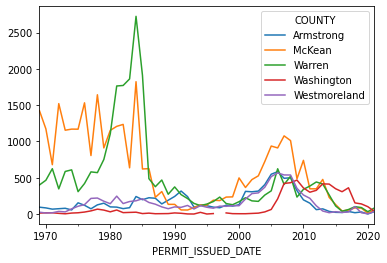

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_26681/88219914.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = new_top5[df.county == 'McKean'].resample('Y', on='permit_issued_date').size().plot()
/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_26681/88219914.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_top5[df.county == 'Warren'].resample('Y', on='permit_issued_date').size().plot(ax=ax)
/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_26681/88219914.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_top5[df.county == 'Venango'].resample('Y', on='permit_issued_date').size().plot(ax=ax)
/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_26681/88219914.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_top5[df.county == 'Indiana'].resample('Y', on='permit_issued_date').size().plot(ax=ax)
/var/f

<AxesSubplot:xlabel='permit_issued_date'>

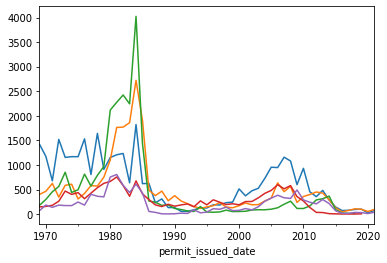

In [199]:
# top_five_counties_df.head()
# df.resample('W', on='permit_issued_date').size().plot()

ax = new_top5[df.county == 'McKean'].resample('Y', on='permit_issued_date').size().plot()
new_top5[df.county == 'Warren'].resample('Y', on='permit_issued_date').size().plot(ax=ax)
new_top5[df.county == 'Venango'].resample('Y', on='permit_issued_date').size().plot(ax=ax)
new_top5[df.county == 'Indiana'].resample('Y', on='permit_issued_date').size().plot(ax=ax)
new_top5[df.county == 'Forest'].resample('Y', on='permit_issued_date').size().plot(ax=ax)

#QUESITON: How to add a key to plot? 

# ax = wheat_beers.IBUs.hist(bins=30, color='magenta')
# ipa.IBUs.hist(ax=ax, bins=30, color='yellow')

You'll want to do roughly the same thing you did for applications up above:

1. Put them in groups based on their year
2. See how many times each county exists for that year
3. `.unstack().plot()`

Before you plot, you should have a dataframe where **years are rows and counties are columns.** If you have a bazillion lines it's because you're using your original dataframe instead of the new top 5 one.

<AxesSubplot:xlabel='permit_issued_date'>

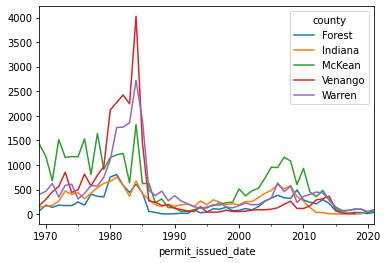

In [200]:
#omg did this too soon

new_top5.resample('Y', on='permit_issued_date').county.value_counts()#.unstack().plot()
new_top5.resample('Y', on='permit_issued_date').county.value_counts().unstack()
new_top5.resample('Y', on='permit_issued_date').county.value_counts().unstack().plot()


## The mid-80s hit Warren County especially hard! What was the percentage drop in new permits 1985 and 1986?

### Step one: Calculating

For the code, just put `.pct_change()` on your county-vs-date dataframe, it'll calculate the percentage change between the columns of each row and the row below it. It shoudl look like this:

|COUNTY|Armstrong|McKean|Warren|Washington|Westmoreland|
|---|---|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|1969-12-31|NaN	|NaN|NaN|NaN|NaN|
|1970-12-31|-0.105263|-0.176264|0.162095|0.214286|-0.423077|
|1971-12-31|-0.200000|-0.420290|0.341202|0.058824|0.200000|

In [201]:
new_top5.resample('Y', on='permit_issued_date').county.value_counts().unstack().pct_change()
#-0.298201, but the year after is -0.744636 --> i feel like I'm not reading something right here?
# QUESTION ^

county,Forest,Indiana,McKean,Venango,Warren
permit_issued_date,,,,,
1969-12-31,NaN,NaN,NaN,NaN,NaN
1970-12-31,1.657143,0.082192,-0.176264,0.675978,0.162095
1971-12-31,-0.252688,0.139241,-0.420290,0.513333,0.341202
1972-12-31,0.323741,0.461111,1.236765,0.240088,-0.444800
1973-12-31,-0.048913,0.787072,-0.240631,0.515098,0.691643
1974-12-31,-0.005714,-0.144681,0.012987,-0.483001,0.037479
1975-12-31,0.419540,0.089552,-0.000855,0.126984,-0.492611
1976-12-31,-0.255061,-0.283105,0.310522,0.637827,0.362460
1977-12-31,1.201087,0.359873,-0.473890,-0.296069,0.380048


### Step two: Writing

But can you turn it into a sentence? Something like...

> after an increase in permits of [blank] percent just two years prior, 1986 saw Warren's new permits plummet a staggering [blank] percent

# Now let's relax a little bit

## Does the government issue permits on the weekends?

To answer this question, calculate the percent of permits are issued on Saturday and Sunday. We know how to get the month and the year and the day of the month from a datetime, but how do you get the day of the week..?

In [189]:
#df.permit_issued_date.dt.day.sort_index()
df.permit_issued_date.dt.dayofweek.value_counts().sort_index()
#The day of the week with Monday=0, Sunday=6.
#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek
df.permit_issued_date.dt.dayofweek.value_counts(normalize=True).sort_index()
#df['Guard_or_Trained'].value_counts(normalize=True, dropna=True)


0    0.180660
1    0.205840
2    0.215018
3    0.199797
4    0.190059
5    0.005662
6    0.002965
Name: permit_issued_date, dtype: float64

In [190]:
(0.005662 + 0.002965)*100

0.8627000000000001

In [ ]:
#Less than 1% of well permits are issued over the weekend.